# NLP with Disaster Tweets

### Target: Predict which Tweets are about real disasters and which ones are not

# Import

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

In [48]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [49]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [50]:
from nltk.stem.porter import PorterStemmer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
import re

In [53]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load Data

In [54]:
data = pd.read_csv('drive/MyDrive/Dataset/diaster_tweets.csv', index_col='id')
data.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [55]:
df= data.copy()

# EDA

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5079 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,7613.0,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


### Missing Value treatment

In [58]:
df.isnull().sum()   # Its good to see not missing values in target

keyword       61
location    2534
text           0
target         0
dtype: int64

In [59]:
# Percentage of Null
(df.isnull().sum()/df.shape[0])*100

keyword      0.801261
location    33.285170
text         0.000000
target       0.000000
dtype: float64

### Distribution of Data

In [60]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

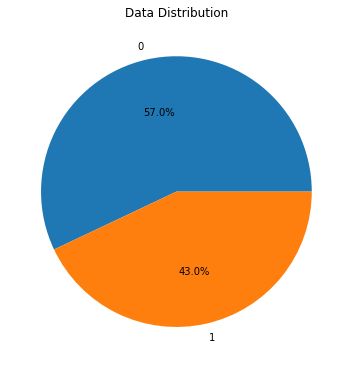

In [61]:
plt.figure(figsize=(5,10))
plt.pie(x=df['target'].value_counts().values, labels=df['target'].value_counts().index, autopct='%1.1f%%')
plt.title('Data Distribution')
plt.tight_layout()

#### it found almost balance dataset

# NLP

# Tokenization

In [65]:
df.text

id
1        Our Deeds are the Reason of this #earthquake M...
4                   Forest fire near La Ronge Sask. Canada
5        All residents asked to 'shelter in place' are ...
6        13,000 people receive #wildfires evacuation or...
7        Just got sent this photo from Ruby #Alaska as ...
                               ...                        
10869    Two giant cranes holding a bridge collapse int...
10870    @aria_ahrary @TheTawniest The out of control w...
10871    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872    Police investigating after an e-bike collided ...
10873    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [66]:
text = list(map(word_tokenize, df.text))
text

[['Our',
  'Deeds',
  'are',
  'the',
  'Reason',
  'of',
  'this',
  '#',
  'earthquake',
  'May',
  'ALLAH',
  'Forgive',
  'us',
  'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada'],
 ['All',
  'residents',
  'asked',
  'to',
  "'shelter",
  'in',
  'place',
  "'",
  'are',
  'being',
  'notified',
  'by',
  'officers',
  '.',
  'No',
  'other',
  'evacuation',
  'or',
  'shelter',
  'in',
  'place',
  'orders',
  'are',
  'expected'],
 ['13,000',
  'people',
  'receive',
  '#',
  'wildfires',
  'evacuation',
  'orders',
  'in',
  'California'],
 ['Just',
  'got',
  'sent',
  'this',
  'photo',
  'from',
  'Ruby',
  '#',
  'Alaska',
  'as',
  'smoke',
  'from',
  '#',
  'wildfires',
  'pours',
  'into',
  'a',
  'school'],
 ['#',
  'RockyFire',
  'Update',
  '=',
  '>',
  'California',
  'Hwy',
  '.',
  '20',
  'closed',
  'in',
  'both',
  'directions',
  'due',
  'to',
  'Lake',
  'County',
  'fire',
  '-',
  '#',
  'CAfire',
  '#',
  'wildfires'],
 ['#',
  

## Removal Stopwords

In [67]:
stop_words = set(stopwords.words('english'))
stop_words   # list of stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [68]:
def removeStops (sentence:list):
    return [ 
        word.lower() for word in sentence if (word.lower().casefold() not in stop_words and  word.isalpha() and word not in 'https')
        ]

In [69]:
filtered_tokens = list(map(removeStops, text))
filtered_tokens[:5] # stop words removed, but need to recheck wether non-alphabatic/special character still removed or not, if non alphabetic add another condition with created fn

[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['residents',
  'asked',
  'place',
  'notified',
  'officers',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school']]

# Lemmatization

In [70]:
lemmatizer = WordNetLemmatizer()

In [71]:
lemmatize = lambda sentence:list (map(lemmatizer.lemmatize, sentence))

In [72]:
lemmatized_tokens = list(map(lemmatize, filtered_tokens))
lemmatized_tokens[:3]     # verify all words are meaningful here!

[['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['resident',
  'asked',
  'place',
  'notified',
  'officer',
  'evacuation',
  'shelter',
  'place',
  'order',
  'expected']]

# Bag of Words

In [73]:
lemmatized_sents = [' '.join(sent)for sent in lemmatized_tokens]  # converting lemmatized_token into its orginal form/sentence, because count vectorizer expect sentence to read as per word
lemmatized_sents[:5]    # now its converted into sent, now we can pass it to count vectorizer or fit & tranform, 

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school']

In [74]:
vectorizer = CountVectorizer()
vectorized_tokens = vectorizer.fit_transform(lemmatized_sents).toarray()

In [75]:
vectorized_tokens

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
vectorized_tokens.shape   # got rows & columns

(7613, 13665)

# Modeling on BOW

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
train_text,test_text,train_labels,test_labels = train_test_split(
    vectorized_tokens, data.target, test_size= .25, random_state=42
)

# Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(train_text, train_labels)

GaussianNB()

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
ypred = bayes_model.predict (test_text)

In [82]:
accuracy_score (test_labels, ypred)

0.6118697478991597

# TF- IDF

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfidf = TfidfTransformer()
tfidf_vector = tfidf.fit_transform(vectorized_tokens).toarray()    
tfidf_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model - with TF-IDF

In [85]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labesl, test_labels = train_test_split(
    tfidf_vector, data.target, test_size = .25, random_state=42
)

In [86]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(train_text, train_labels)

GaussianNB()

In [87]:
ypred = bayes_model.predict (test_text)

In [88]:
accuracy_score (test_labels, ypred)

0.6102941176470589